# Problem statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

# Business goal

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
pd.set_option('display.max_columns',None)

# Step 1: Reading and understanding the data
Let's start with the following steps:

Importing data using the pandas library
Understanding the structure of the data

In [2]:
data=pd.read_csv("E:/data sets/cardata/CarPrice_Assignment.csv")

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.shape

(205, 26)

In [5]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
data.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

# Step 2: Data cleaning and preparation

In [8]:
data['symboling']=data.symboling.astype('object')

In [9]:
#Splitting company name from CarName column
CompanyName = data['CarName'].apply(lambda x : x.split(' ')[0])
data.insert(3,"CompanyName",CompanyName)
data.drop(['CarName'],axis=1,inplace=True)
data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [11]:
data.CompanyName=data.CompanyName.str.lower()

In [12]:
data.CompanyName.replace("maxda","mazda",inplace=True)
data.CompanyName.replace("porcshce","porsche",inplace=True)
data.CompanyName.replace("toyouta","toyota",inplace=True)
data.CompanyName.replace("vokswagen","volkswagen",inplace=True)
data.CompanyName.replace("vw","volkswagen",inplace=True)

In [13]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [14]:
#checking for duplicates
data.loc[data.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [15]:
data.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Step 3: Visualizing the data

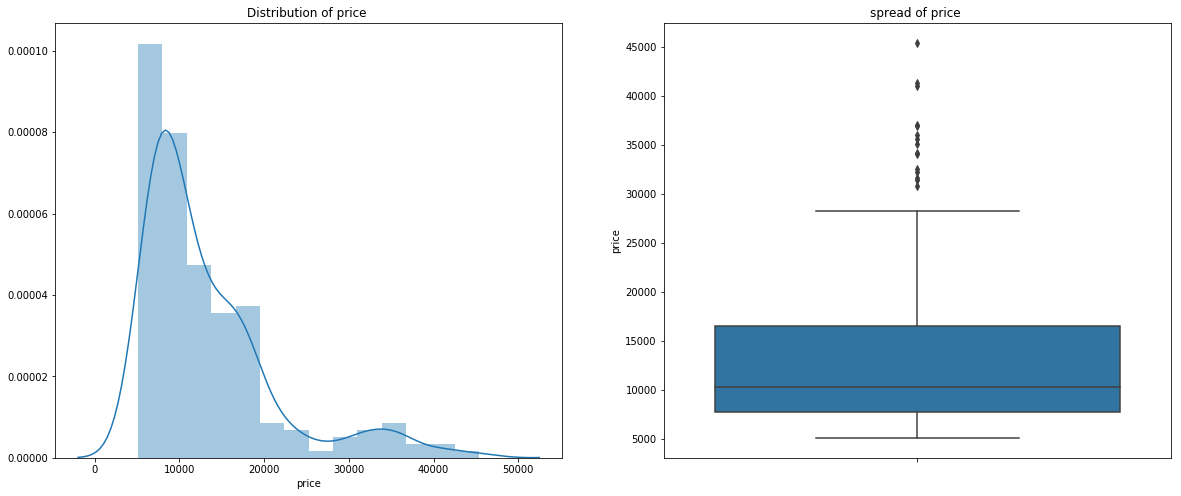

In [16]:
#visualizing the target variable "Price".
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(data.price)
plt.title("Distribution of price ")

plt.subplot(1,2,2)
sns.boxplot(y=data.price)
plt.title("spread of price ")

plt.show()

In [17]:
print(data.price.describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


# Inference
1) The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).

2)There is a significant difference between the mean and the median of the price distribution.

3)The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

In [18]:
data.drop('car_ID',axis=1,inplace=True)

In [19]:
data.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [20]:
cat_cols=[feature for feature in data.columns if data[feature].dtypes=='O']
cat_cols

['symboling',
 'CompanyName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [21]:
num_cols= data.columns.difference(cat_cols)
num_cols

Index(['boreratio', 'carheight', 'carlength', 'carwidth', 'citympg',
       'compressionratio', 'curbweight', 'enginesize', 'highwaympg',
       'horsepower', 'peakrpm', 'price', 'stroke', 'wheelbase'],
      dtype='object')

# step 3.1 : Visualising categorical data 

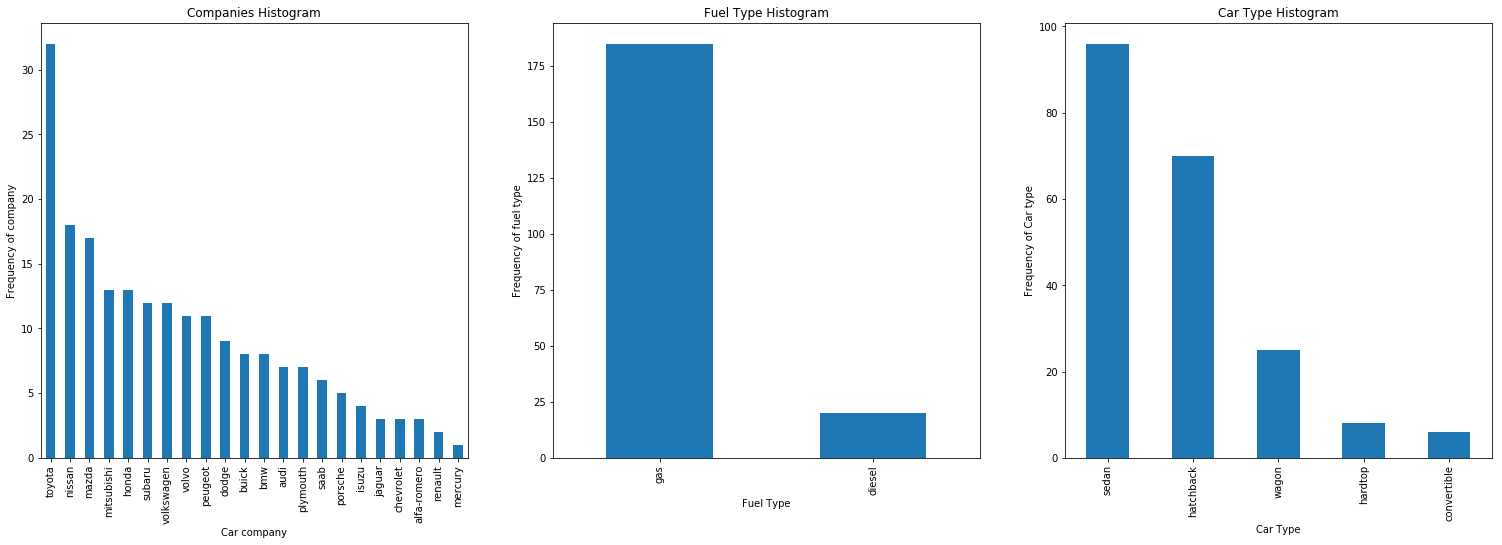

In [22]:
plt.figure(figsize=(26, 8))

plt.subplot(1,3,1)
plt1 = data.CompanyName.value_counts().plot('bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = data.fueltype.value_counts().plot('bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = data.carbody.value_counts().plot('bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

# Inference :
1)Toyota seemed to be favored car company.

2)Number of gas fueled cars are more than diesel.

3)sedan is the top car type prefered.

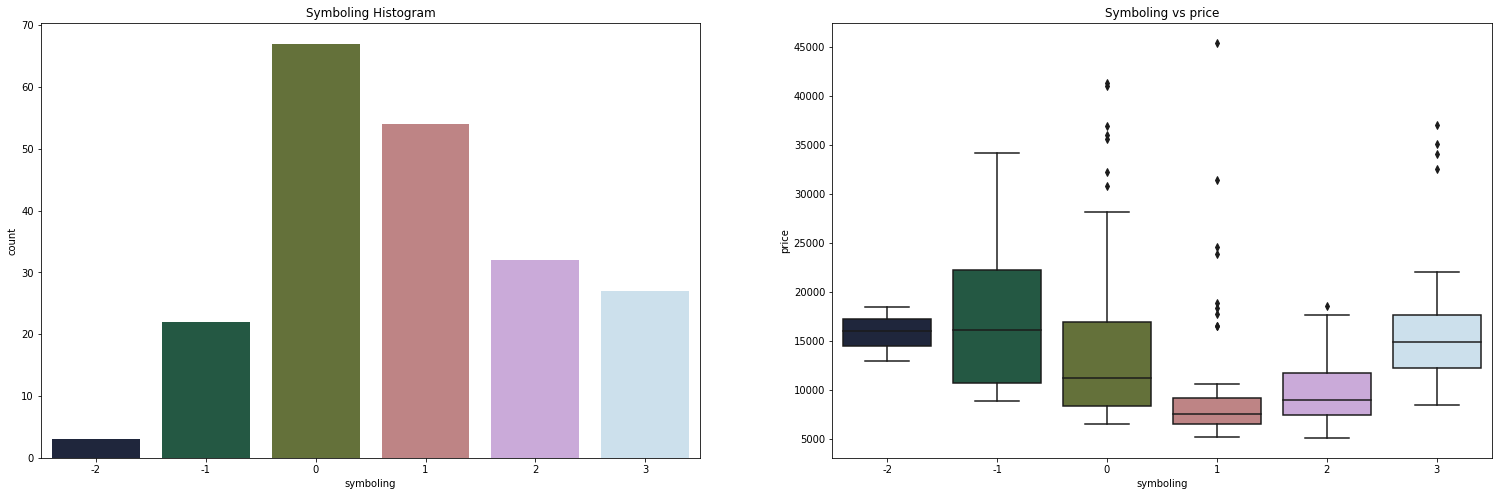

In [23]:
plt.figure(figsize=(26,8))

plt.subplot(1,2,1)
sns.countplot(data.symboling,palette=('cubehelix'))
plt.title("Symboling Histogram")

plt.subplot(1,2,2)
sns.boxplot(x=data.symboling,y=data.price,palette=('cubehelix'))
plt.title('Symboling vs price')

plt.show()

# Inference :
It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)

The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

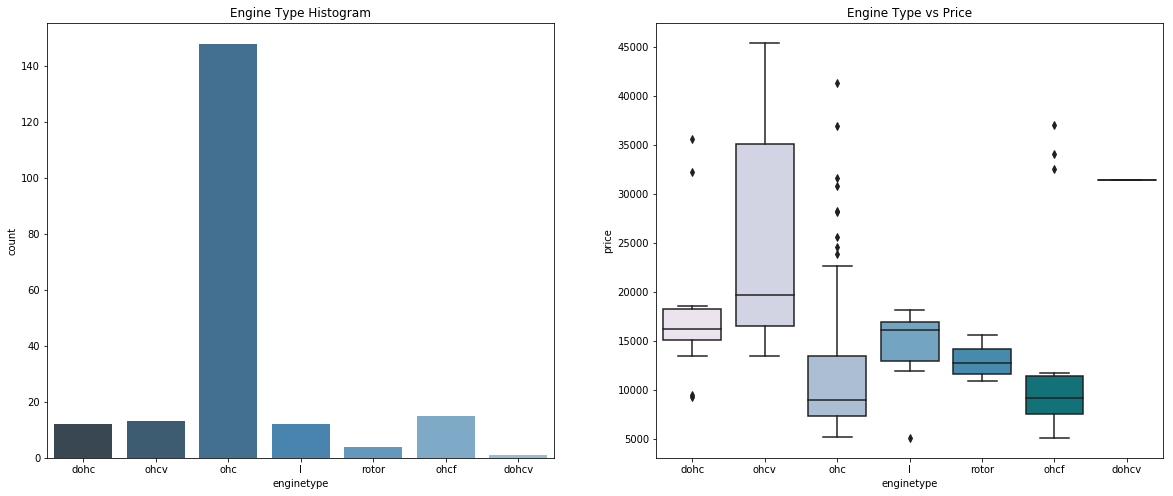

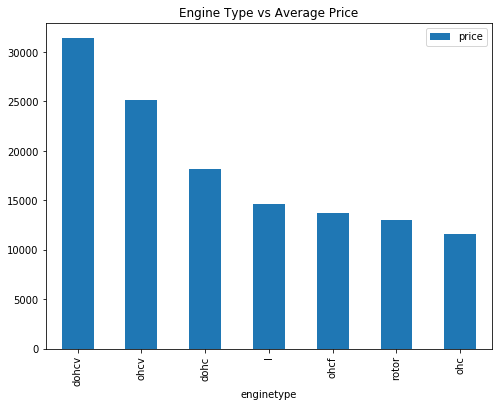

In [24]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(data.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=data.enginetype, y=data.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(data.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

# Inference :
ohc Engine type seems to be most favored type.

ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.

<Figure size 1800x432 with 0 Axes>

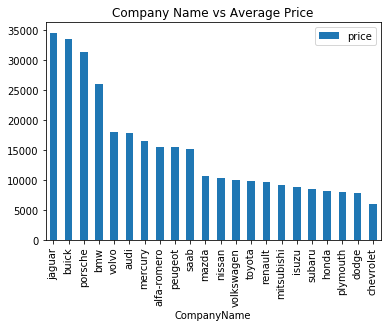

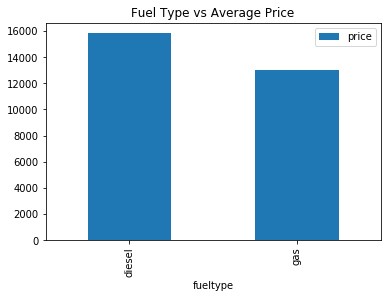

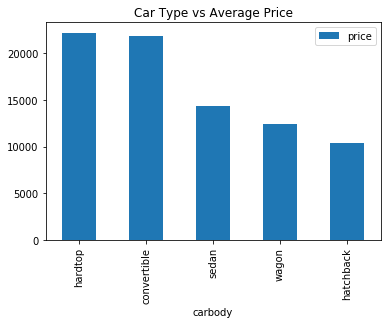

In [25]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(data.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(data.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(data.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

# Inference :
Jaguar and Buick seem to have highest average price.

diesel has higher average price than gas.

hardtop and convertible have higher average price.

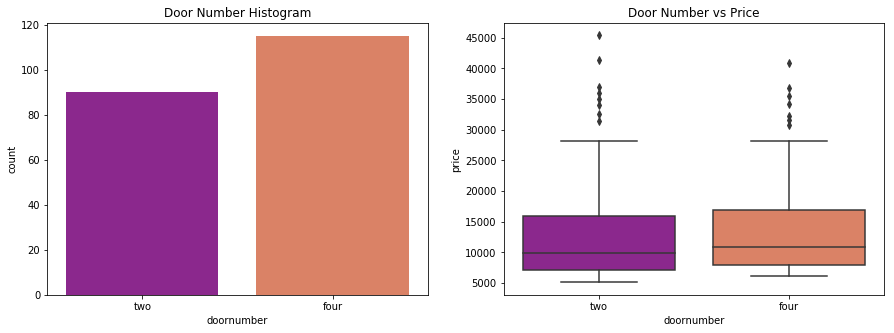

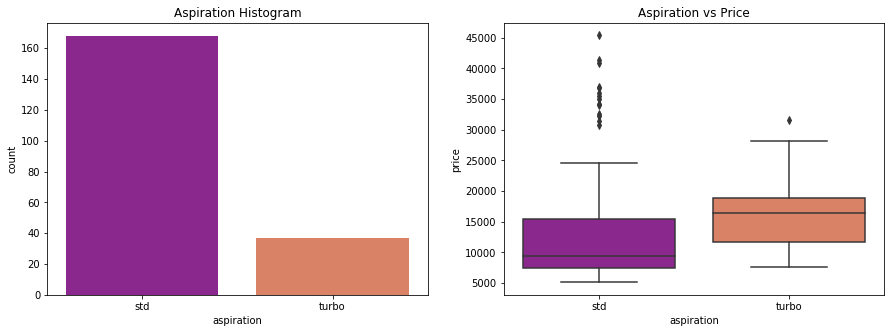

In [26]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(data.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=data.doornumber, y=data.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(data.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=data.aspiration, y=data.price, palette=("plasma"))

plt.show()

# Inference :
doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.

It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)

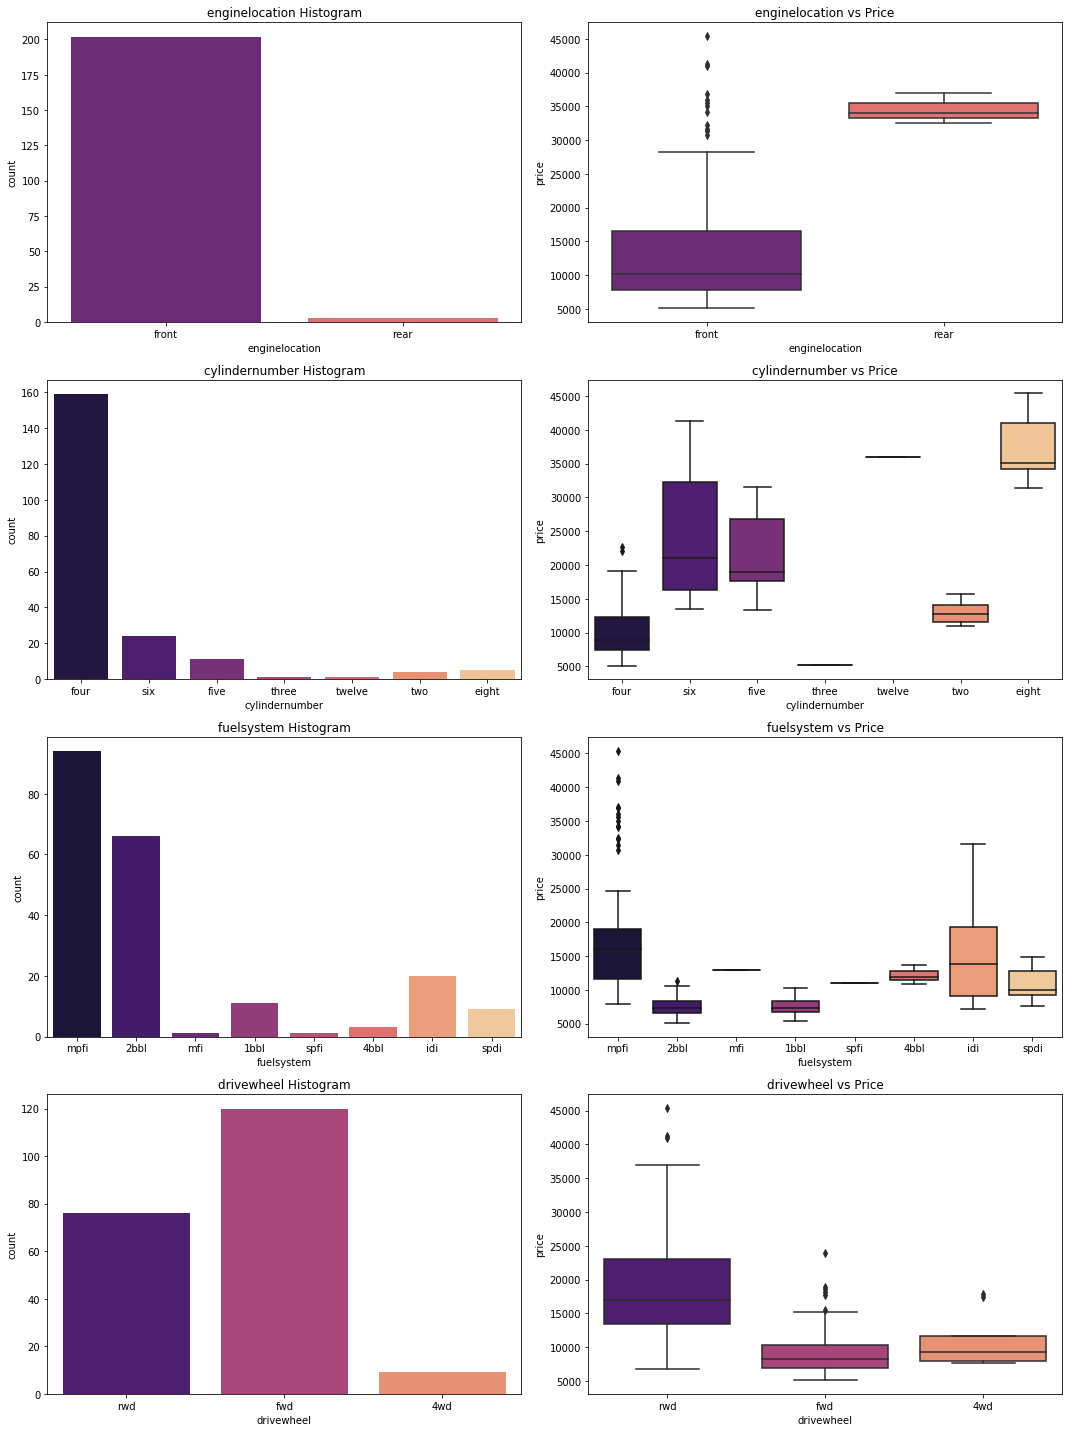

In [27]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(data[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=data[x], y=data.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

# Inference :
1)Very few datapoints for enginelocation categories to make an inference.

2)Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.

3)mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference

4)A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

# step 3.2 : Visualising Numeric data

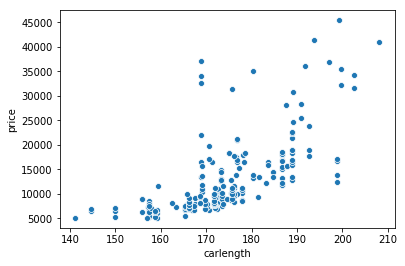

In [28]:
sns.scatterplot(data.carlength,data.price)

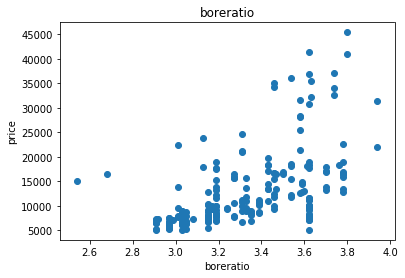

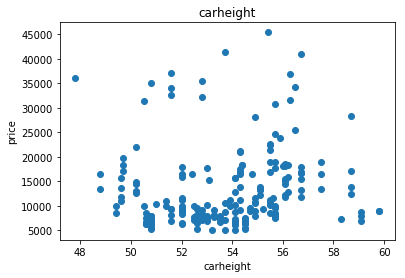

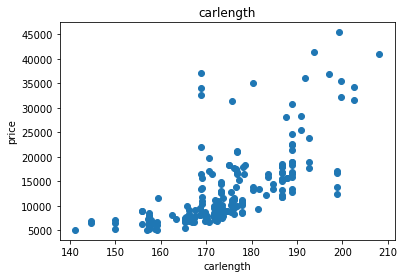

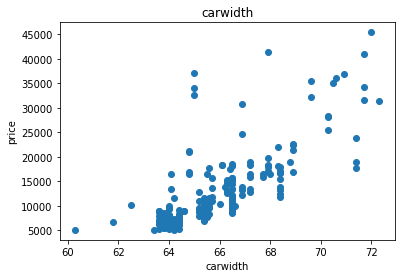

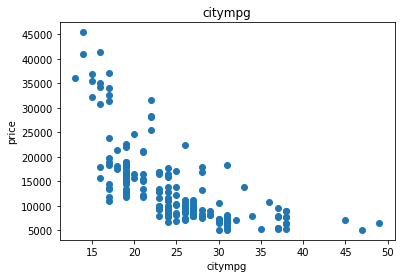

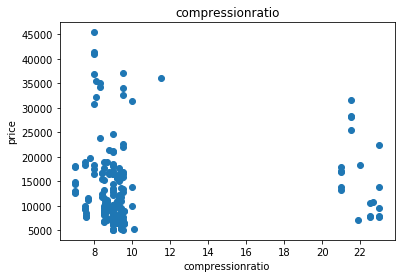

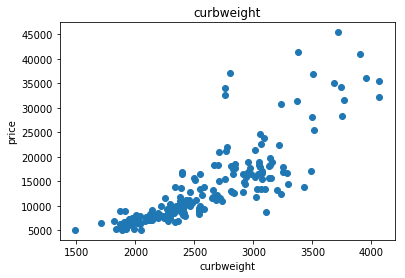

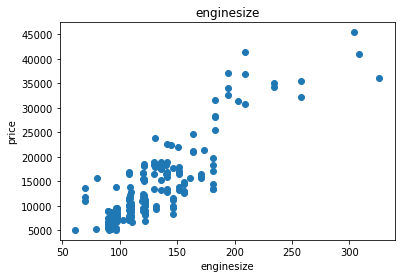

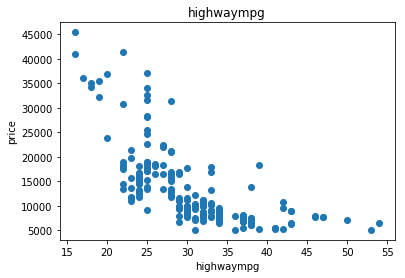

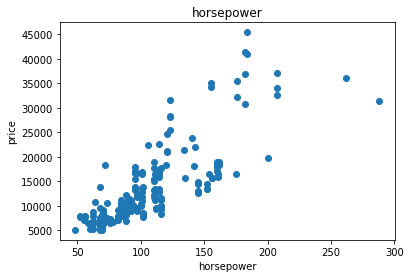

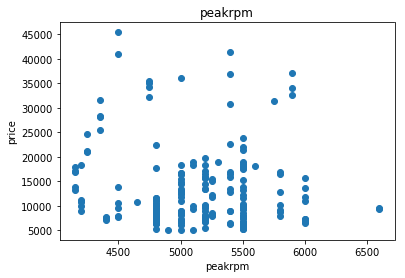

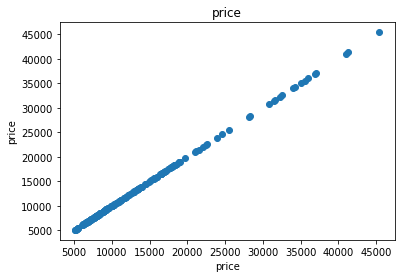

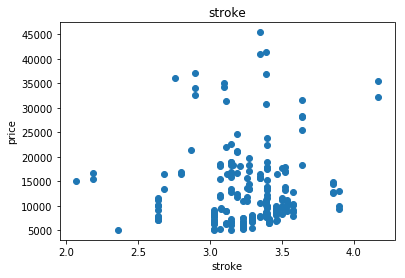

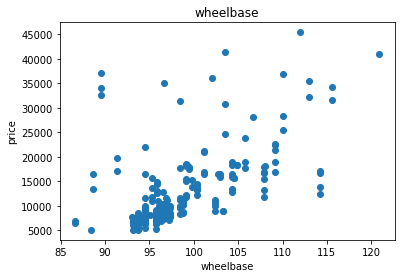

In [29]:
for feature in num_cols:
    data=data.copy()
    plt.scatter(data[feature],data['price'])
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

# Inference :
1)carwidth, carlength, curbweight, enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.

2)citympg, highwaympg - seem to have a significant negative correlation with price.

3)carheight doesn't show any significant trend with price.

In [30]:
data.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [31]:
final_df=data[['fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber','boreratio','carlength', 
               'carwidth','citympg','enginesize','highwaympg','horsepower','wheelbase','price']]

final_df.head()

,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber,boreratio,carlength,carwidth,citympg,enginesize,highwaympg,horsepower,wheelbase,price
0,gas,std,convertible,rwd,dohc,four,3.47,168.8,64.1,21,130,27,111,88.6,13495.0
1,gas,std,convertible,rwd,dohc,four,3.47,168.8,64.1,21,130,27,111,88.6,16500.0
2,gas,std,hatchback,rwd,ohcv,six,2.68,171.2,65.5,19,152,26,154,94.5,16500.0
3,gas,std,sedan,fwd,ohc,four,3.19,176.6,66.2,24,109,30,102,99.8,13950.0
4,gas,std,sedan,4wd,ohc,five,3.19,176.6,66.4,18,136,22,115,99.4,17450.0


In [32]:
final_df.shape

(205, 15)

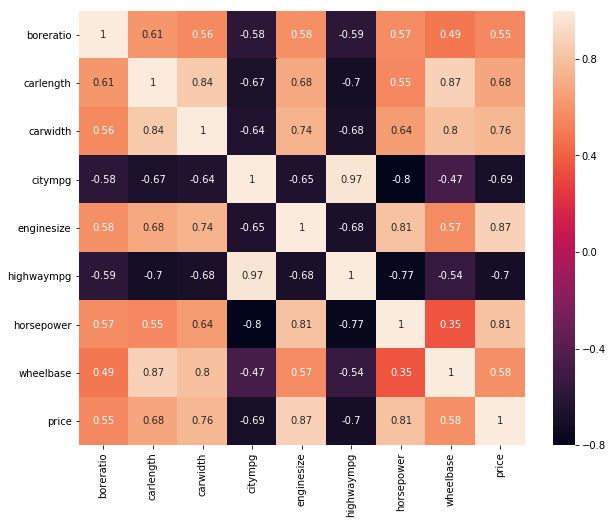

In [33]:
corr=final_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

In [34]:
final_df.head()

,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber,boreratio,carlength,carwidth,citympg,enginesize,highwaympg,horsepower,wheelbase,price
0,gas,std,convertible,rwd,dohc,four,3.47,168.8,64.1,21,130,27,111,88.6,13495.0
1,gas,std,convertible,rwd,dohc,four,3.47,168.8,64.1,21,130,27,111,88.6,16500.0
2,gas,std,hatchback,rwd,ohcv,six,2.68,171.2,65.5,19,152,26,154,94.5,16500.0
3,gas,std,sedan,fwd,ohc,four,3.19,176.6,66.2,24,109,30,102,99.8,13950.0
4,gas,std,sedan,4wd,ohc,five,3.19,176.6,66.4,18,136,22,115,99.4,17450.0


In [35]:
final_df=pd.get_dummies(final_df,drop_first=True)

In [36]:
#separating the independent and dependent column
y=final_df.price
X=final_df
X.drop('price',axis=1,inplace=True)

# Train test split

In [37]:
#spliting the train data into train_X,train_y,valid_X,valid_y

from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,train_size=0.7,random_state=1)

#printing the shape of train_X,train_y,validation_X,validation_y
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(143, 28)
(62, 28)
(143,)
(62,)


In [38]:
train_X.head()

,boreratio,carlength,carwidth,citympg,enginesize,highwaympg,horsepower,wheelbase,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
124,3.59,173.2,66.3,19,156,24,145,95.9,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
181,3.27,187.8,66.5,19,161,24,156,104.5,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
154,3.05,169.7,63.6,27,92,32,62,95.7,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
53,3.03,166.8,64.2,31,91,38,68,93.1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
94,3.15,165.3,63.8,31,97,37,69,94.5,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0


In [39]:
num_cols = ["boreratio","carlength","carwidth","citympg","enginesize","highwaympg","horsepower","wheelbase"]


In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(train_X[num_cols])
train_X[num_cols]=scaler.transform(train_X[num_cols])


In [41]:
train_X.head()

,boreratio,carlength,carwidth,citympg,enginesize,highwaympg,horsepower,wheelbase,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
124,0.930577,-0.129820,0.124696,-0.909193,0.668636,-0.948853,0.914374,-0.479744,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
181,-0.249340,1.118628,0.217568,-0.909193,0.790191,-0.948853,1.178381,0.969150,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
154,-1.060533,-0.429105,-1.129080,0.342452,-0.887264,0.250581,-1.077679,-0.513440,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
53,-1.134278,-0.677085,-0.850463,0.968274,-0.911575,1.150157,-0.933675,-0.951477,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
94,-0.691809,-0.805350,-1.036208,0.968274,-0.765710,1.000228,-0.909675,-0.715611,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0


In [42]:
train_X.shape

(143, 28)

In [43]:
test_X[num_cols]=scaler.transform(test_X[num_cols])

In [44]:
print(train_X.shape)
print(test_X.shape)

(143, 28)
(62, 28)


# Model building

# base model

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin=LinearRegression()
lin.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
train_pred=lin.predict(train_X)
test_pred=lin.predict(test_X)

In [53]:
from sklearn.metrics import r2_score
print('train mse:',np.sqrt(mean_squared_error(train_pred,train_y)))
print('test mse:',np.sqrt(mean_squared_error(test_pred,test_y)))
      
print('train r2:',r2_score(train_pred,train_y))
print('test r2 mse:',r2_score(test_pred,test_y))

train mse: 2258.95998794106
test mse: 2788.9806248513255
train r2: 0.9142373755251114
test r2 mse: 0.8500889523010807


# RFE(Recursive Feature Elimination)

In [68]:
from sklearn.feature_selection import RFE
li=LinearRegression()
rfe=RFE(estimator=li,n_features_to_select=10)
rfe.fit(train_X,train_y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [69]:
rfe.get_support()

array([False, False, False, False,  True, False, False, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False,  True, False,  True,  True,  True, False,  True,
       False])

In [70]:
features=train_X.columns[rfe.get_support()]

In [71]:
features

Index(['enginesize', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_twelve'],
      dtype='object')

In [72]:
train_X_rfe=rfe.transform(train_X)
test_X_rfe=rfe.transform(test_X)

In [73]:
print(train_X_rfe.shape)
print(test_X_rfe.shape)

(143, 10)
(62, 10)


In [74]:
linear=LinearRegression()
linear.fit(train_X_rfe,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
train_pred2=linear.predict(train_X_rfe)
test_pred2=linear.predict(test_X_rfe)

In [76]:
print('train mse:',np.sqrt(mean_squared_error(train_pred2,train_y)))
print('test mse:',np.sqrt(mean_squared_error(test_pred2,test_y)))
      
print('train r2:',r2_score(train_pred2,train_y))
print('test r2 mse:',r2_score(test_pred2,test_y))

train mse: 3027.8072968380566
test mse: 3062.641434701579
train r2: 0.8346257097973095
test r2 mse: 0.8378676452573508


# Extra tree Regressor

In [100]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(train_X,train_y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features=15, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

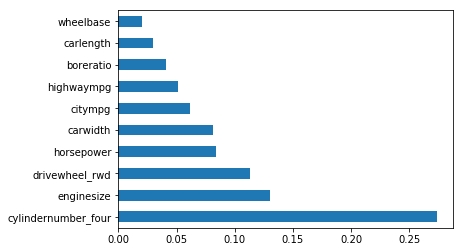

In [105]:
feat_importances = pd.Series(model.feature_importances_, index=train_X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [107]:
train_pred3=model.predict(train_X)
test_pred3=model.predict(test_X)

print('train mse:',np.sqrt(mean_squared_error(train_pred3,train_y)))
print('test mse:',np.sqrt(mean_squared_error(test_pred3,test_y)))
      
print('train r2:',r2_score(train_pred3,train_y))
print('test r2 mse:',r2_score(test_pred3,test_y))

train mse: 432.564490523134
test mse: 2401.119492828662
train r2: 0.9970952583449852
test r2 mse: 0.8926622401564757


# SelectkBest

In [112]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_regression
#apply SelectKBest class to extract top 10 best features
sel = SelectKBest(score_func=f_regression,k=15)
sel.fit(train_X,train_y)

SelectKBest(k=15, score_func=<function f_regression at 0x00000285739089D8>)

In [114]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False, False, False,  True,  True, False, False,
        True, False,  True, False, False,  True,  True, False, False,
       False])

In [116]:
feat=train_X.columns[sel.get_support()]

In [117]:
feat

Index(['boreratio', 'carlength', 'carwidth', 'citympg', 'enginesize',
       'highwaympg', 'horsepower', 'wheelbase', 'carbody_hardtop',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_ohc', 'enginetype_ohcv',
       'cylindernumber_four', 'cylindernumber_six'],
      dtype='object')

In [118]:
train_X_sel=sel.transform(train_X)
test_X_sel=sel.transform(test_X)

In [119]:
linear=LinearRegression()
linear.fit(train_X_sel,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
train_pred4=linear.predict(train_X_sel)
test_pred4=linear.predict(test_X_sel)

In [121]:
print('train mse:',np.sqrt(mean_squared_error(train_pred4,train_y)))
print('test mse:',np.sqrt(mean_squared_error(test_pred4,test_y)))
      
print('train r2:',r2_score(train_pred4,train_y))
print('test r2 mse:',r2_score(test_pred4,test_y))

train mse: 3004.8792052308772
test mse: 2803.4409588064887
train r2: 0.8375262131017734
test r2 mse: 0.8466923799596292


In [123]:
X_train = train_X[train_X.columns[sel.get_support()]]
X_train.head()

,boreratio,carlength,carwidth,citympg,enginesize,highwaympg,horsepower,wheelbase,carbody_hardtop,drivewheel_fwd,drivewheel_rwd,enginetype_ohc,enginetype_ohcv,cylindernumber_four,cylindernumber_six
124,0.930577,-0.129820,0.124696,-0.909193,0.668636,-0.948853,0.914374,-0.479744,0,0,1,1,0,1,0
181,-0.249340,1.118628,0.217568,-0.909193,0.790191,-0.948853,1.178381,0.969150,0,0,1,0,0,0,1
154,-1.060533,-0.429105,-1.129080,0.342452,-0.887264,0.250581,-1.077679,-0.513440,0,0,0,1,0,1,0
53,-1.134278,-0.677085,-0.850463,0.968274,-0.911575,1.150157,-0.933675,-0.951477,0,1,0,1,0,1,0
94,-0.691809,-0.805350,-1.036208,0.968274,-0.765710,1.000228,-0.909675,-0.715611,0,1,0,1,0,1,0


In [130]:
X_test=test_X[test_X.columns[sel.get_support()]]
X_test.head()

,boreratio,carlength,carwidth,citympg,enginesize,highwaympg,horsepower,wheelbase,carbody_hardtop,drivewheel_fwd,drivewheel_rwd,enginetype_ohc,enginetype_ohcv,cylindernumber_four,cylindernumber_six
78,-1.355513,-1.489431,-0.757591,0.968274,-0.887264,1.150157,-0.933675,-0.850392,0,1,0,1,0,1,0
97,-0.691809,-0.386350,-1.036208,0.968274,-0.765710,1.000228,-0.909675,-0.715611,0,1,0,1,0,1,0
151,-1.060533,-1.369717,-1.129080,0.968274,-0.887264,1.150157,-1.077679,-0.513440,0,1,0,1,0,1,0
44,-1.134278,-1.609145,-1.129080,2.063462,-0.935886,1.899803,-0.885674,-0.715611,0,1,0,1,0,1,0
40,-0.691809,0.058302,-1.639878,0.342452,-0.449667,0.400510,-0.501664,-0.378659,0,1,0,1,0,1,0


In [131]:
reg=LinearRegression()
reg.fit(X_train,train_y)

train_pred5=reg.predict(X_train)
test_pred5=reg.predict(X_test)

In [132]:
print('train mse:',np.sqrt(mean_squared_error(train_pred5,train_y)))
print('test mse:',np.sqrt(mean_squared_error(test_pred5,test_y)))
      
print('train r2:',r2_score(train_pred5,train_y))
print('test r2 mse:',r2_score(test_pred5,test_y))

train mse: 3004.8792052308772
test mse: 2803.4409588064887
train r2: 0.8375262131017734
test r2 mse: 0.8466923799596292
